# 6 Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.
## Objective
### In this exercise, you will build and train a Fully Connected Network (FCN) to classify Devnagari digits using TensorFlow and Keras. You will manually load and process the dataset using the Python Imaging Library (PIL) and then train the model with three hidden layers.

## Task 1: Data Preparation
### Loading the Data
#### • Download the provided folder that contains the Devnagari digits dataset.
#### • Use the Python Imaging Library (PIL) to load and read the image files from the dataset.
#### • Convert the images into Numpy arrays and normalize them to a range of 0-1.
#### • use train folder for training and test for testing.
#### • Extract the corresponding labels for each image.
### Hints:
#### • Ensure that the images are resized to a consistent shape (e.g., 28x28).
#### • Convert labels to one-hot encoded format for multi-class classification.

In [ ]:
!pip install gdown

!gdown 1xsjOC7I9AsIaKUl4eiF8A7aCBsiFaS8T

!unzip "devnagari.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1xsjOC7I9AsIaKUl4eiF8A7aCBsiFaS8T
From (redirected): https://drive.google.com/uc?id=1xsjOC7I9AsIaKUl4eiF8A7aCBsiFaS8T&confirm=t&uuid=dd53a075-0060-4918-bfea-bb797bfb2bbd
To: /content/devnagari.zip
100% 16.6M/16.6M [00:00<00:00, 55.3MB/s]
Archive:  devnagari.zip
replace DevanagariHandwrittenDigitDataset/Test/digit_0/103277.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

3.8.0


In [ ]:
train_path = "DevanagariHandwrittenDigitDataset/Train/"
test_path = "DevanagariHandwrittenDigitDataset/Test/"

# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_path)
x_test, y_test = load_images_from_folder(test_path)

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


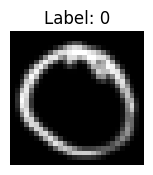

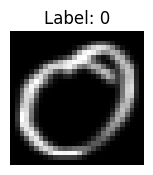

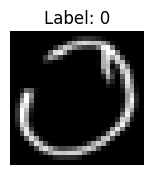

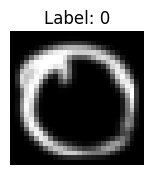

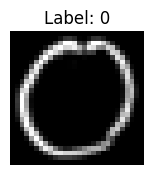

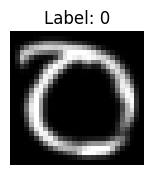

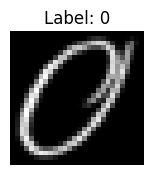

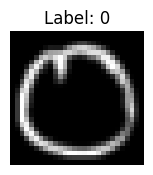

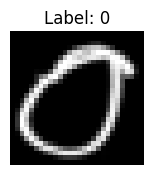

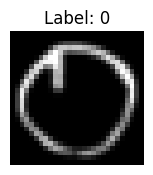

In [ ]:
num_classes = 10

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images

for i in range(10):
  plt.figure(figsize=(10, 4))
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
  plt.show()

## Task 2: Build the FCN Model
### Model Architecture
#### • Create a Sequential model using Keras.
#### • Add 3 hidden layers with the following number of neurons:
##### – 1st hidden layer: 64 neurons
##### – 2nd hidden layer: 128 neurons
##### – 3rd hidden layer: 256 neurons
#### • Use sigmoid activation functions for all hidden layers.
#### • Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [ ]:
input_shape = (28, 28, 1)
model = keras.Sequential([
    keras.layers.Input(shape = input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,490 (56.60 KB)

 Trainable params: 14,490 (56.60 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Compile the Model
### Model Compilation
#### • Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy), and evaluation metric (e.g., accuracy).

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Task 4: Train the Model
### Model Training
#### • Use the model.fit() function to train the model. Set the batch size to 128 and the number of epochs to 20.
#### • Use validation split (validation split=0.2) to monitor the model’s performance on validation data.
#### • Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience = 4)
]

model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2,
    callbacks = callbacks
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2046 - loss: 2.3074 - val_accuracy: 0.0000e+00 - val_loss: 3.9464
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4878 - loss: 1.9105 - val_accuracy: 0.0000e+00 - val_loss: 4.6360
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6297 - loss: 1.4534 - val_accuracy: 0.0000e+00 - val_loss: 5.1182
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7542 - loss: 1.0365 - val_accuracy: 0.0000e+00 - val_loss: 5.5507
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8376 - loss: 0.7891 - val_accuracy: 0.0000e+00 - val_loss: 5.9151


## Task 5: Evaluate the Model
### Model Evaluation
#### • After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [ ]:
test_loss, test_acc = model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=batch_size,
    verbose=2,
    sample_weight=None,
    steps=None,
    callbacks=callbacks
)

print(f"Testing accuracy: {test_acc:.4f} The accuracy value computed based on the test dataset. It shows the proportion of correct predictions made by the model.")
print(f"Testing loss: {test_loss:.4f} The loss value computed based on the test dataset. This gives an indication of how well the model is performing on unseen data.")

24/24 - 0s - 4ms/step - accuracy: 0.6920 - loss: 1.7144
Testing accuracy: 0.6920 The accuracy value computed based on the test dataset. It shows the proportion of correct predictions made by the model.
Testing loss: 1.7144 The loss value computed based on the test dataset. This gives an indication of how well the model is performing on unseen data.


## Task 6: Save and Load the Model
### Model Saving and Loading
#### • Save the trained model to an .h5 file using model.save().
#### • Load the saved model and re-evaluate its performance on the test set.

In [ ]:
model.save("devanagari_digit_model.keras")

In [ ]:
loaded_model = tf.keras.models.load_model("devanagari_digit_model.keras")

loaded_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

test_loss, test_acc = loaded_model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=batch_size,
    verbose=2
)

print(f"Testing accuracy: {test_acc:.4f}")
print(f"Testing loss: {test_loss:.4f}")

24/24 - 0s - 16ms/step - accuracy: 0.6920 - loss: 1.7144
Testing accuracy: 0.6920
Testing loss: 1.7144


## Task 7: Predictions
### Making Predictions
#### • Use model.predict() to make predictions on test images.
#### • Convert the model’s predicted probabilities to digit labels using np.argmax().
## Expected Deliverables
### • Code Implementation: Complete code for building, training, evaluating, saving, and loading the model.
### • Visualization: Graphs showing the training and validation loss and accuracy.
### • Test Accuracy: Display the final test accuracy.
### • Saved Model: Submit the saved .h5 model file.

In [ ]:
predictions = model.predict(x_test)

prediction_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

print(f"Predicted labels: {prediction_labels[:10]}")
print(f"Actual labels: {actual_labels[:10]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted labels: [0 0 0 0 0 0 0 0 0 0]
Actual labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8805 - loss: 0.6245 - val_accuracy: 0.0000e+00 - val_loss: 6.2283
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9001 - loss: 0.5043 - val_accuracy: 0.0000e+00 - val_loss: 6.5030
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9274 - loss: 0.4099 - val_accuracy: 0.0000e+00 - val_loss: 6.7833
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9333 - loss: 0.3465 - val_accuracy: 0.0000e+00 - val_loss: 7.0317
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9443 - loss: 0.2902 - val_accuracy: 0.0000e+00 - val_loss: 7.3033


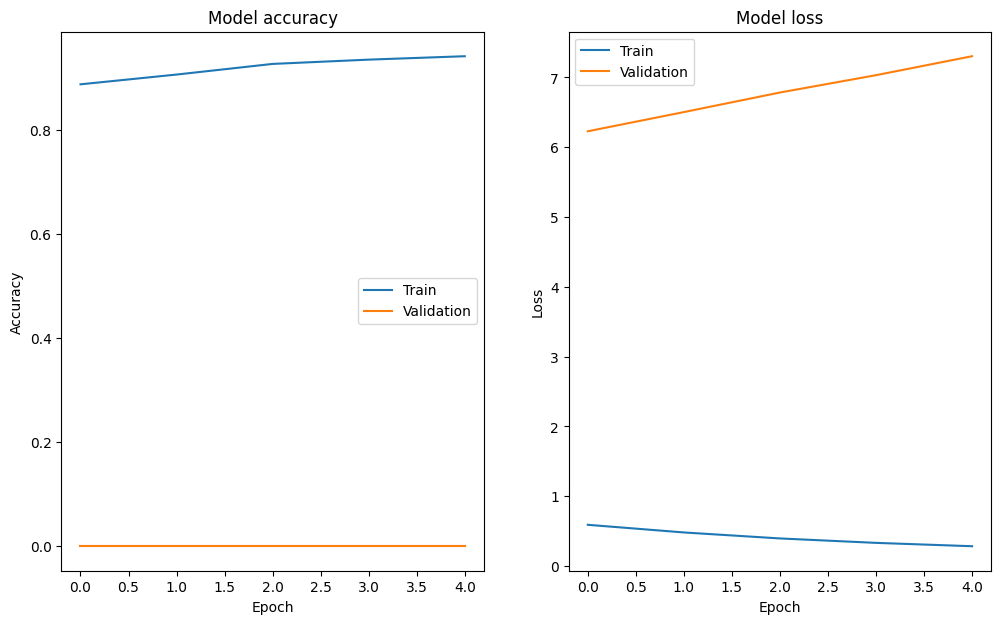

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()